<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/tempreture_forecasting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drive mounting

In [1]:
#first to mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/jena_climate_2009_2016.csv")
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [3]:
df = df[5::6] #only take from 5 and increase by 6 and so on
df #now df contain information about one clock not every 10 minuts

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420425,31.12.2016 19:50:00,1001.55,-1.65,271.39,-6.55,69.05,5.41,3.74,1.67,2.32,3.73,1283.24,0.73,1.20,212.0
420431,31.12.2016 20:50:00,1001.33,-3.46,269.59,-7.13,75.60,4.73,3.57,1.15,2.22,3.57,1291.65,0.81,1.16,201.4
420437,31.12.2016 21:50:00,1000.81,-2.48,270.62,-6.95,71.20,5.09,3.62,1.47,2.25,3.62,1286.24,0.24,0.52,9.4
420443,31.12.2016 22:50:00,1000.32,-4.09,269.05,-7.23,78.60,4.51,3.54,0.96,2.21,3.54,1293.37,1.25,1.60,199.2


In [4]:
df.index = pd.to_datetime(df['Date Time'],format = '%d.%m.%Y %H:%M:%S')
df[:25]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


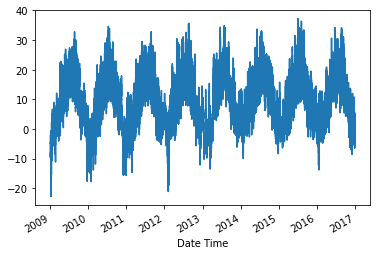

In [5]:
temp = df['T (degC)']
temp.plot()

In [6]:
#[[[1],[2],[3],[4]]]                                  [5]
#[[[2],[3],[4],[5]]]                                  [6]
#[[[3],[4],[5],[6]]]                                  [7]
# past values depend on which model will forecast      output
#the previouse shape since the model need 3d tensor
from sklearn.preprocessing import StandardScaler
def df_to_X_y(df,window_size):
  df_as_np = df.to_numpy()
  #scaler = StandardScaler()
  #df_as_np = scaler.fit_transform((df_as_np.reshape(1,-1).T))
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    y.append(df_as_np[i+window_size])
  return np.array(X) , np.array(y)

In [7]:
WIDOW_SIZE = 5
X,y = df_to_X_y(temp,WIDOW_SIZE)
X = X.reshape(X.shape[0],X.shape[1],X.shape[2])

In [8]:
X.shape , y.shape

((70070, 5, 1), (70070,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.111)

In [10]:
X_train.shape , X_test.shape ,X_val.shape #80% train , 10% test , 10% validation

((56063, 5, 1), (7007, 5, 1), (7000, 5, 1))

In [11]:
y_train.shape , y_test.shape ,y_val.shape

((56063,), (7007,), (7000,))

In [12]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint #to save checkpoints
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


#Model1


In [14]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [15]:
cp = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model1/',save_best_only= True) #make check point
model1.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate=0.0001),metrics = [MeanSquaredError()])

In [16]:
history = model1.fit(X_train,y_train , validation_data = (X_val , y_val),epochs = 10 ,callbacks= [cp])

Epoch 1/10
1748/1752 [============================>.] - ETA: 0s - loss: 37.3853 - mean_squared_error: 37.3853

1752/1752 [==============================] - 18s 8ms/step - loss: 37.3102 - mean_squared_error: 37.3097 - val_loss: 3.9302 - val_mean_squared_error: 3.9292
Epoch 2/10
1747/1752 [============================>.] - ETA: 0s - loss: 2.1080 - mean_squared_error: 2.1080

1752/1752 [==============================] - 17s 10ms/step - loss: 2.1043 - mean_squared_error: 2.1043 - val_loss: 1.2124 - val_mean_squared_error: 1.2120
Epoch 3/10
1747/1752 [============================>.] - ETA: 0s - loss: 0.9592 - mean_squared_error: 0.9592

1752/1752 [==============================] - 11s 6ms/step - loss: 0.9587 - mean_squared_error: 0.9587 - val_loss: 0.8154 - val_mean_squared_error: 0.8152
Epoch 4/10
1746/1752 [============================>.] - ETA: 0s - loss: 0.7415 - mean_squared_error: 0.7415

1752/1752 [==============================] - 12s 7ms/step - loss: 0.7414 - mean_squared_error: 0.7414 - val_loss: 0.7154 - val_mean_squared_error: 0.7154
Epoch 5/10
1744/1752 [============================>.] - ETA: 0s - loss: 0.6784 - mean_squared_error: 0.6784

1752/1752 [==============================] - 12s 7ms/step - loss: 0.6781 - mean_squared_error: 0.6781 - val_loss: 0.6809 - val_mean_squared_error: 0.6809
Epoch 6/10
1741/1752 [============================>.] - ETA: 0s - loss: 0.6558 - mean_squared_error: 0.6558

1752/1752 [==============================] - 11s 6ms/step - loss: 0.6557 - mean_squared_error: 0.6557 - val_loss: 0.6618 - val_mean_squared_error: 0.6618
Epoch 7/10
1743/1752 [============================>.] - ETA: 0s - loss: 0.6462 - mean_squared_error: 0.6462

1752/1752 [==============================] - 12s 7ms/step - loss: 0.6467 - mean_squared_error: 0.6467 - val_loss: 0.6567 - val_mean_squared_error: 0.6566
Epoch 8/10
1751/1752 [============================>.] - ETA: 0s - loss: 0.6411 - mean_squared_error: 0.6411

1752/1752 [==============================] - 11s 6ms/step - loss: 0.6412 - mean_squared_error: 0.6412 - val_loss: 0.6490 - val_mean_squared_error: 0.6490
Epoch 9/10
1752/1752 [==============================] - 7s 4ms/step - loss: 0.6364 - mean_squared_error: 0.6364 - val_loss: 0.6678 - val_mean_squared_error: 0.6678
Epoch 10/10
1742/1752 [============================>.] - ETA: 0s - loss: 0.6329 - mean_squared_error: 0.6329

1752/1752 [==============================] - 12s 7ms/step - loss: 0.6335 - mean_squared_error: 0.6335 - val_loss: 0.6448 - val_mean_squared_error: 0.6448


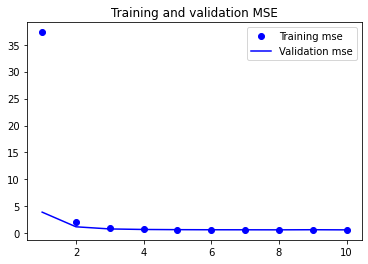

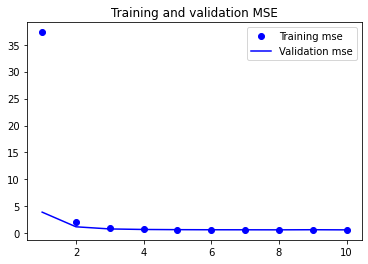

In [17]:
import matplotlib.pyplot as plt
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training mse')
plt.plot(epochs, val_acc, 'b', label='Validation mse')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training mse')
plt.plot(epochs, val_loss, 'b', label='Validation mse')
plt.title('Training and validation MSE')
plt.legend()
plt.show()

In [18]:
model1.save("/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model1.h5")

In [19]:
loss , mse = model1.evaluate(X_test,y_test)

219/219 [==============================] - 1s 2ms/step - loss: 0.6520 - mean_squared_error: 0.6519


In [13]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model1.h5',compile = False)

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [15]:
train_prediction = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data = {"Train prediction":train_prediction , 'Actuals':y_train})
train_results

,Train prediction,Actuals
0,15.025857,15.48
1,7.815012,7.88
2,15.164196,15.43
3,8.931535,8.82
4,19.704830,19.67
...,...,...
56058,16.217760,15.62
56059,13.957929,14.24
56060,5.890140,5.92
56061,0.958104,0.41


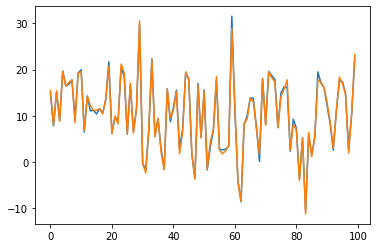

In [20]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train prediction'][:100])
plt.plot(train_results['Actuals'][:100])

In [21]:
val_prediction = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data = {"Validation prediction":val_prediction , 'Actuals':y_val})
val_results

,Validation prediction,Actuals
0,12.562805,12.98
1,13.592465,13.68
2,6.719965,6.84
3,-0.670557,0.75
4,22.043058,22.46
...,...,...
6995,22.528526,22.96
6996,3.932530,4.21
6997,12.236050,13.08
6998,7.566131,7.84


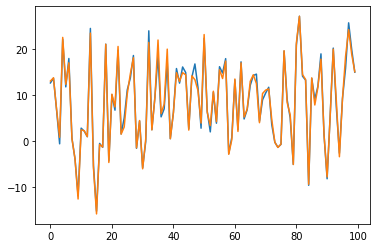

In [23]:
plt.plot(val_results['Validation prediction'][:100])
plt.plot(val_results['Actuals'][:100])

In [24]:
test_prediction = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data = {"Test prediction":test_prediction , 'Actuals':y_test})
test_results

,Test prediction,Actuals
0,17.243498,16.97
1,26.458067,25.36
2,17.801254,17.84
3,17.126484,17.77
4,11.608786,11.90
...,...,...
7002,12.856270,13.07
7003,13.375313,14.55
7004,13.020781,11.40
7005,16.737185,16.30


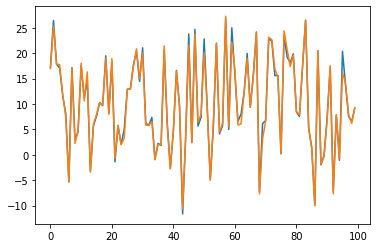

In [25]:
plt.plot(test_results['Test prediction'][:100])
plt.plot(test_results['Actuals'][:100])